In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np


In [2]:
%matplotlib inline

In [3]:
sns.set(rc={'figure.figsize': (11.7, 8.27)}, style="white", color_codes=True)
plt.rc('pdf', fonttype=42)  # Embed font

In [4]:
def load_build_df(filename, collection, convert_units=True):
    build_df = pd.read_csv(filename, index_col=None)
    build_df.drop(['bytes_per_second', 'items_per_second',
                 'label', 'error_occurred', 'error_message' ], axis=1, inplace=True)
    build_df['collection'] = collection
    if convert_units:
        build_df.cpu_time = build_df.cpu_time/(10**9)  # ns to s
        build_df.real_time = build_df.real_time/(10**9)
        build_df.TotalBytes =  build_df.TotalBytes/1024/1024 # B to MB
        build_df.TotalBytesRate = build_df.TotalBytesRate/1024/1024 # B to MB
    return build_df

In [5]:
build_wiki = load_build_df('../../export/data/build-times_wiki.csv', 'wiki')
build_cweb = load_build_df('../../export/data/build-times_cweb.csv', 'cweb')
build_bing = load_build_df('../../export/data/build-times_bing.csv', 'bing')

In [6]:
combined_build = build_bing.append(build_wiki, ignore_index=True).append(build_cweb, ignore_index=True)

In [7]:
combined_build

,name,nrows,iterations,real_time,cpu_time,time_unit,NPQ,PQByesInvRate,PQBytes,PQBytesRate,TotalByesInvRate,TotalBytes,TotalBytesRate,collection
0,BuildHTrie,512,3200,0.000219,0.000220,ns,512.0,7.108740e-05,9.891000e+03,45015000.0,5.026990e-05,0.013339,60.707474,bing
1,BuildHTrie,1024,1544,0.000433,0.000435,ns,1024.0,3.472580e-05,1.934800e+04,44462600.0,2.439630e-05,0.026264,60.356331,bing
2,BuildHTrie,2048,747,0.001031,0.001025,ns,2048.0,1.916220e-05,3.995500e+04,38983000.0,1.358960e-05,0.053729,52.422047,bing
3,BuildHTrie,4096,373,0.001845,0.001843,ns,4096.0,8.690210e-06,7.911200e+04,42921900.0,6.144980e-06,0.106697,57.888031,bing
4,BuildHTrie,8192,166,0.004132,0.004142,ns,8192.0,4.314350e-06,1.593520e+05,38476300.0,3.057080e-06,0.214470,51.784706,bing
5,BuildHTrie,16384,112,0.007325,0.007394,ns,16384.0,2.602420e-06,3.182140e+05,43036900.0,1.843200e-06,0.428473,57.948875,bing
6,BuildHTrie,32768,34,0.020041,0.020221,ns,32768.0,1.079480e-06,6.368830e+05,31496800.0,7.647160e-07,0.857379,42.401314,bing
7,BuildHTrie,65536,19,0.036706,0.036184,ns,65536.0,5.400540e-07,1.273020e+06,35181700.0,3.825160e-07,1.714048,47.370052,bing
8,BuildHTrie,131072,7,0.097524,0.098214,ns,131072.0,2.704230e-07,2.542310e+06,25885300.0,1.914570e-07,3.424530,34.867954,bing
9,BuildHTrie,262144,3,0.217280,0.218750,ns,262144.0,1.289840e-07,5.087850e+06,23258700.0,9.133610e-08,6.852150,31.324100,bing


In [8]:
def total_build_time(combined_build):
    max_idx = combined_build.groupby(['name', 
                 'collection'])['nrows'].transform(max) == combined_build['nrows']
    return combined_build[max_idx]

In [9]:
tbuild_df = total_build_time(combined_build)

In [10]:
tbf_sel = tbuild_df[['name', 'collection', 'cpu_time', 'TotalBytes', 'TotalBytesRate']]

In [11]:
print tbf_sel.to_latex(index=None)

\begin{tabular}{llrrr}
\toprule
        name & collection &    cpu\_time &   TotalBytes &  TotalBytesRate \\
\midrule
  BuildHTrie &       bing &     8.07812 &   302.603722 &       37.459660 \\
 BuildMarisa &       bing &    46.62500 &   302.603722 &        6.490154 \\
   BuildDAWG &       bing &    80.73440 &   302.603722 &        3.748140 \\
 BuildIncNgT &       bing &  1891.42000 &   302.603722 &        0.159987 \\
  BuildHTrie &       wiki &     5.53125 &   106.706619 &       19.291496 \\
 BuildMarisa &       wiki &    16.85940 &   106.706619 &        6.329193 \\
   BuildDAWG &       wiki &    43.89060 &   106.706619 &        2.431183 \\
 BuildIncNgT &       wiki &   680.29700 &   106.706619 &        0.156853 \\
  BuildHTrie &       cweb &   152.40600 &  3332.662582 &       21.866989 \\
 BuildMarisa &       cweb &   634.00000 &  3332.662582 &        5.256567 \\
   BuildDAWG &       cweb &  1176.81000 &  3332.662582 &        2.831936 \\
 BuildIncNgT &       cweb &  7289.16000 &   89

In [12]:
tbf_sel

,name,collection,cpu_time,TotalBytes,TotalBytesRate
15,BuildHTrie,bing,8.07812,302.603722,37.459660
31,BuildMarisa,bing,46.62500,302.603722,6.490154
47,BuildDAWG,bing,80.73440,302.603722,3.748140
63,BuildIncNgT,bing,1891.42000,302.603722,0.159987
78,BuildHTrie,wiki,5.53125,106.706619,19.291496
93,BuildMarisa,wiki,16.85940,106.706619,6.329193
108,BuildDAWG,wiki,43.89060,106.706619,2.431183
123,BuildIncNgT,wiki,680.29700,106.706619,0.156853
142,BuildHTrie,cweb,152.40600,3332.662582,21.866989
161,BuildMarisa,cweb,634.00000,3332.662582,5.256567


# Bytes Rate

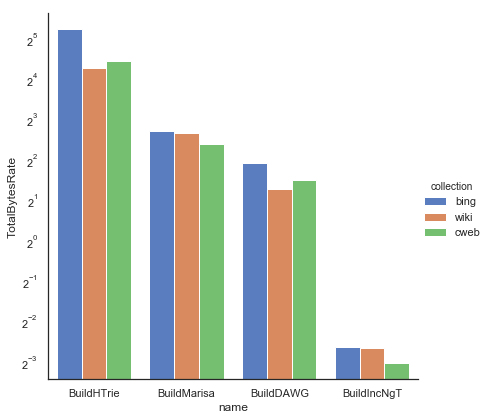

In [13]:
sns.catplot(x="name", y="TotalBytesRate", hue="collection", data=tbf_sel,
                height=6, kind="bar", palette="muted")
plt.yscale('log', basey=2)

# Build time vs collection size

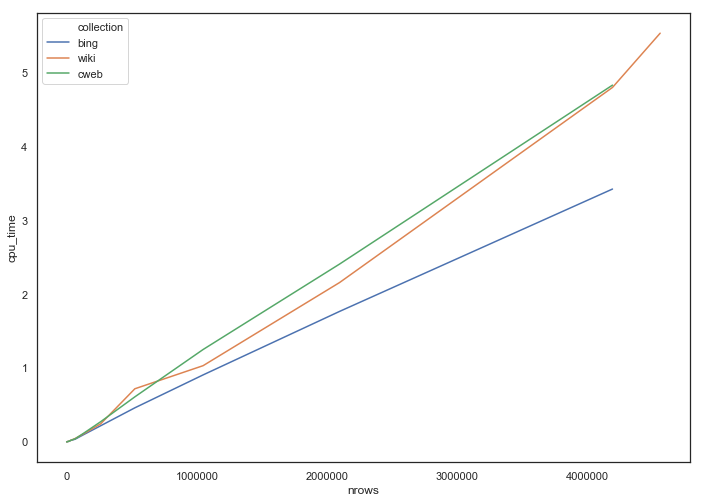

In [14]:
slice_df = combined_build[(combined_build.name == 'BuildHTrie') & (combined_build.nrows <= 5000000)]
sns.lineplot(x="nrows", y="cpu_time", hue="collection", data=slice_df)

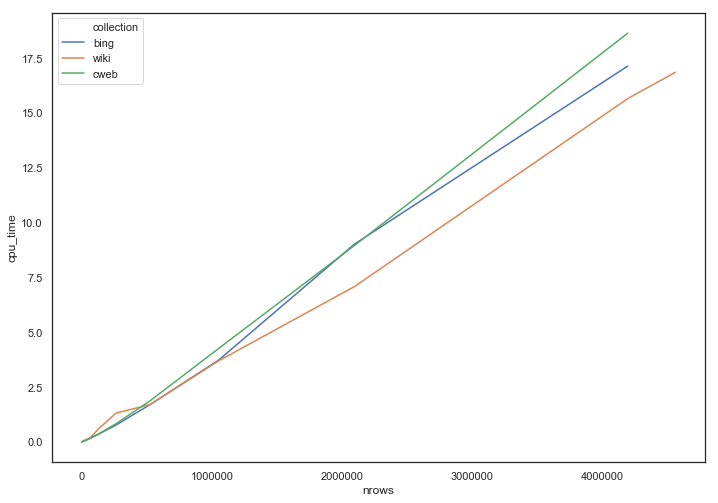

In [15]:
slice_df = combined_build[(combined_build.name == 'BuildMarisa') & (combined_build.nrows <= 5000000)]
sns.lineplot(x="nrows", y="cpu_time", hue="collection", data=slice_df)

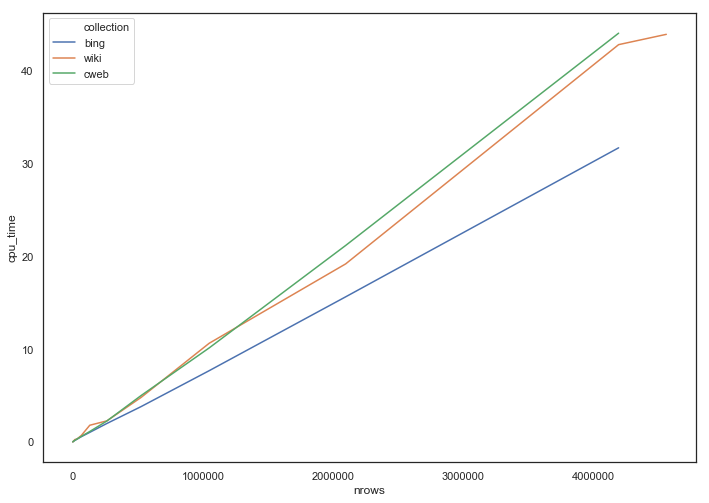

In [16]:
slice_df = combined_build[(combined_build.name == 'BuildDAWG') & (combined_build.nrows <= 5000000)]
sns.lineplot(x="nrows", y="cpu_time", hue="collection", data=slice_df)

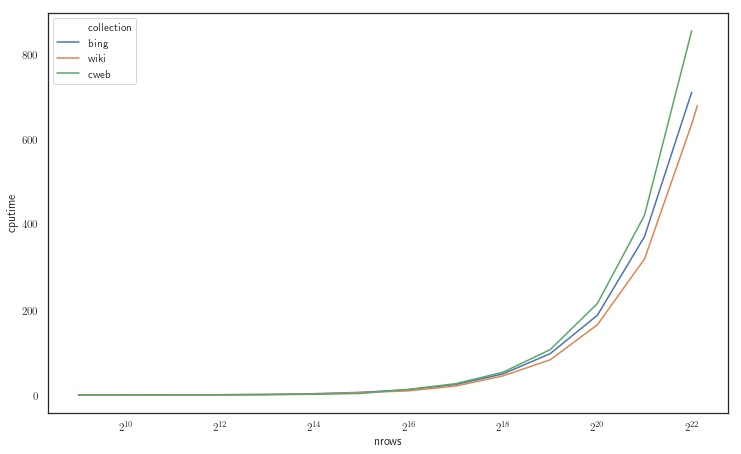

In [35]:
slice_df = combined_build[(combined_build.name == 'BuildIncNgT') & (combined_build.nrows <= 5000000)]
slice_df.columns = [u'name', u'nrows', u'iterations', u'real_time', u'cputime',
       u'time_unit', u'NPQ', u'PQByesInvRate', u'PQBytes', u'PQBytesRate',
       u'TotalByesInvRate', u'TotalBytes', u'TotalBytesRate', u'collection']

ax = sns.lineplot(x="nrows", y="cputime", hue="collection", data=slice_df)
# xticks = slice_df.nrows.unique()
# xticks = sorted(xticks)
# ax.xaxis.set_ticks(xticks)
ax.set_xscale('log', basex=2)
plt.show()

In [18]:
def plot_buildtime_nrows(combined_build, impl, cutoff_nrows=5000000):
    slice_df = combined_build[(combined_build.name == impl) & (combined_build.nrows <= cutoff_nrows)]
    sns.lineplot(x="nrows", y="cpu_time", hue="collection", data=slice_df)
    sns.despine()
    plt.show()


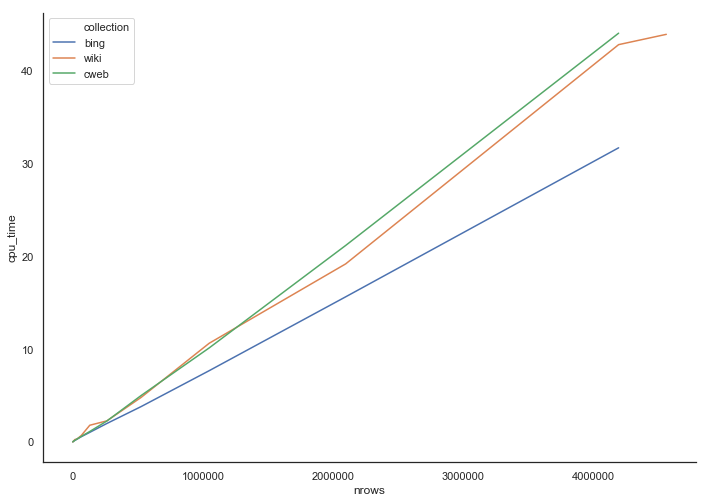

In [19]:
plot_buildtime_nrows(combined_build, 'BuildDAWG')

## As a Facet grid

In [20]:
slice_df = combined_build[(combined_build.nrows <= 5000000)]

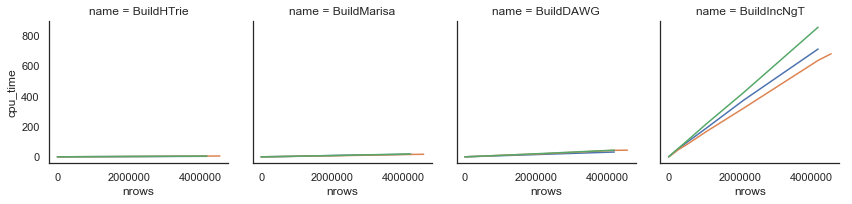

In [21]:
grid = sns.FacetGrid(slice_df, col="name")
grid.map(sns.lineplot, "nrows", "cpu_time", "collection")

#### Hard to manage the scales. Each implementation has order og magnitude difference. It is better to plot them on seperate plots.

# As a class implementation

In [84]:
class MyPlt:
    """ Custom class encapsulating various plotting functions.
    """
    BING_LABEL = r'{\tt Bing-QAC-2018}'
    WIKI_LABEL = r'{\tt Wiki-Synth}'
    CWEB_LABEL = r'{\tt CWeb-Synth}'

    TEX_LASTP = r' ($\mbox{\sf{FinalP}}$)'
    BING_LP_LABEL = BING_LABEL + TEX_LASTP
    WIKI_LP_LABEL = WIKI_LABEL + TEX_LASTP
    CWEB_LP_LABEL = CWEB_LABEL + TEX_LASTP

    WIKI_COLOR = '#486824'
    CWEB_COLOR = '#F2C057'
    BING_COLOR = '#D13525'
    # Old colors
    COLOR2 = '#00a5c6'
    COLOR1 = '#b2d800'
    COLOR4 = '#fb6542'
    COLOR3 = '#ffbb00'
    _DIR_PATH = '../export/images/'
    _TEST_DIR_PATH = '../test/images/'
    _AX_LABEL_SIZE = 36
    _TICK_LABEL_SIZE = 28
    _LEGEND_LABEL_SIZE = 26
    _LINE_WIDTH = 6
    _DASHL_WIDTH = 5
    _MARKER_SIZE = _LINE_WIDTH + 10
    _dev_run = False

    @staticmethod
    def _initialise_plot():
        sns.set(rc={
                    'figure.figsize': (11.7, 8.27),
                    'text.usetex' : True },
                style="white",
                color_codes=True)
        plt.rc('pdf', fonttype=42) # Embed font

    @staticmethod
    def _save_and_clear(outfile, despine=True):
        plt.tight_layout()
        if despine:
            sns.despine()
        if MyPlt._dev_run:
            plt.savefig(MyPlt._TEST_DIR_PATH + outfile, dpi=100)
        else:
            plt.savefig(MyPlt._DIR_PATH + outfile, dpi=100)

        plt.clf()  # Clear the current plot
        
    @staticmethod
    def plot_buildtime_nrows(combined_build, impl, outfile, cutoff_nrows=None,
                             xlabel="Collection size", ylabel="Build time"):
        from matplotlib.ticker import MultipleLocator, FuncFormatter
        MyPlt._initialise_plot()
        if cutoff_nrows == None: 
            cutoff_nrows = combined_build.groupby(combined_build.collection)['nrows'].agg(max).min()
        slice_df = combined_build[(combined_build.name == impl)
                    & (combined_build.nrows <= cutoff_nrows)]
        ax = sns.lineplot(x="nrows", y="cpu_time", hue="collection", data=slice_df, 
                          marker="o", alpha=.6)
        ax.set_xscale('log', basex=2)
        
        plt.xlabel(xlabel, fontsize=MyPlt._AX_LABEL_SIZE)
        plt.ylabel(ylabel, fontsize=MyPlt._AX_LABEL_SIZE)
        plt.xticks(fontsize=MyPlt._TICK_LABEL_SIZE, rotation=0)
        plt.yticks(fontsize=MyPlt._TICK_LABEL_SIZE)
        
        plt.setp(ax.lines,linewidth=MyPlt._LINE_WIDTH)  # set lw for all lines
        plt.setp(ax.lines,markersize=MyPlt._MARKER_SIZE)  # set lw for all lines
        
        leg = plt.legend(loc='upper left', prop={'size': MyPlt._LEGEND_LABEL_SIZE})
        for legobj in leg.legendHandles:
            legobj.set_linewidth(MyPlt._LINE_WIDTH)
        
        leg.get_texts()[0].set_text('Collection')
        for t in leg.get_texts()[1:]:
            if t.get_text() == u'bing':
                t.set_text(MyPlt.BING_LABEL)
            elif t.get_text() == u'cweb':
                t.set_text(MyPlt.CWEB_LABEL)
            elif t.get_text() == u'wiki':
                t.set_text(MyPlt.WIKI_LABEL)
            else:
                raise ValueError('Invalid collection name: ' + str(t))
                    
        sns.despine()
        plt.show()
        # MyPlt._save_and_clear(outfile)

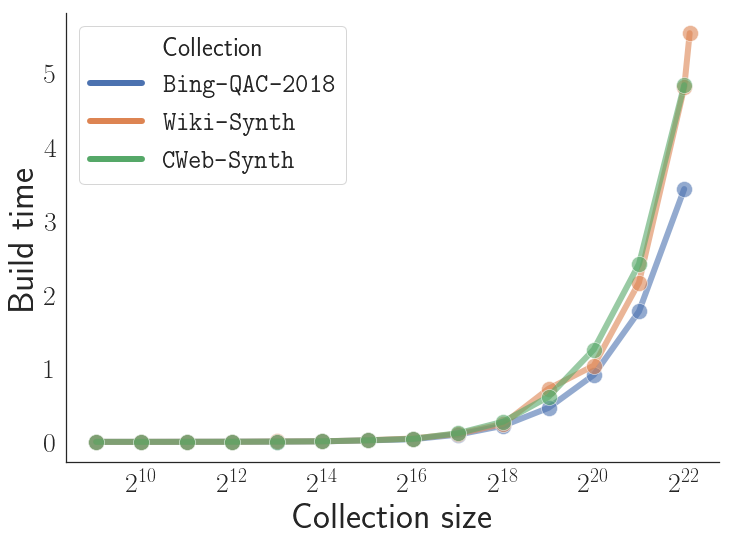

In [85]:
MyPlt.plot_buildtime_nrows(combined_build, 'BuildHTrie', 'dawg-build.pdf')